In [4]:
from google.colab import files
uploaded=files.upload()

Saving time_series_covid19_confirmed_US.csv to time_series_covid19_confirmed_US.csv


In [37]:
!pip install statsmodels==0.12.1
!pip install pmdarima

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset
df=pd.read_csv('time_series_covid19_confirmed_US.csv')
display(df)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818,2873,2893,2945
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051,9163,9341,9501
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189,1206,1214,1217
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204,1239,1252,1270
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061,3100,3158,3231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,756,761,772,779,796,802,814,847,862,873,897,922,932,977,1007,1022,1025,1066,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476,1476,1547,1570,1606,1644,1655,1678,1693,1724
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,442,451,462,469,479,484,488,492,510,518,529,542,544,551,568,614,627,664,686,719,729,760,796,835,869,894,901,920,950,982,1016,1016,1037,1037,1046,1070,1089,1121,1149,1175
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146,151,153,153,158,159,160,160,167,175,179,188,185,187,190,197,199,203,206,208,218,227,253,263,274,290,298,315,325,339,395,395,415,417,428,441,468,487,497,518


In [69]:
#Selecting on New York Data
df.drop(df[df['Province_State']!='New York'].index, inplace=True)
display(df)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
1900,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3590,3613,3627,3660,3705,3725,3750,3771,3802,3845,3877,3942,4024,4049,4095,4192,4252,4336,4425,4514,4529,4572,4653,4730,4822,4906,5013,5108,5148,5233,5324,5426,5555,5618,5712,5816,5968,6138,6258,6406
1901,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,287,289,308,314,336,342,348,364,374,379,389,414,455,469,471,484,503,543,589,628,644,650,667,692,709,758,807,846,856,869,907,930,983,997,1019,1042,1058,1069,1095,1127
1902,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55086,55213,55354,55527,55661,55767,55912,55999,56165,56292,56460,56655,56817,57064,57234,57425,57657,57917,58205,58491,58712,58905,59265,59548,59856,60233,60635,60979,61316,61617,61964,62378,62770,63149,63548,63997,64494,65005,65530,66128
1903,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3415,3516,3566,3620,3662,3710,3738,3759,3789,3835,3884,3927,3982,4003,4032,4086,4167,4215,4303,4362,4394,4431,4469,4545,4620,4688,4792,4859,4927,4983,5054,5143,5201,5234,5308,5367,5448,5551,5657,5768
1904,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,462,470,502,517,527,536,549,550,562,568,582,591,599,605,611,618,627,642,661,675,678,683,695,739,780,809,842,877,901,919,956,997,1058,1075,1114,1135,1164,1199,1252,1291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,84036115,US,USA,840,36115.0,Washington,New York,US,43.311538,-73.430434,"Washington, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334,335,336,338,340,347,350,353,356,358,361,377,380,380,382,384,390,390,395,400,403,404,407,407,411,414,418,422,430,433,435,439,440,444,449,452,457,461,464,470
1960,84036117,US,USA,840,36117.0,Wayne,New York,US,43.154944,-77.029765,"Wayne, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,471,482,488,512,530,550,561,573,588,602,622,639,655,663,676,689,704,718,735,749,757,780,808,824,854,858,901,912,967,983,1012,1052,1083,1095,1127,1148,1175,1206,1243,1300
1961,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,40202,40322,40438,40554,40681,40800,40946,41061,41226,41360,41542,41720,41954,42179,42454,42696,42940,43292,43656,44093,44346,44576,44975,45335,45672,46064,46469,46841,47262,47632,47964,48441,49102,49646,50110,50693,51220,51790,52418,53186
1962,84036121,US,USA,840,36121.0,Wyoming,New York,US,42.701451,-78.221996,"Wyoming, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185,186,188,192,

In [70]:
#Dropping columns with 0 Covid Cases in all rows
l=[]
for i in df.columns[11:]:
    if df[i].mean()==0:
        l.append(i)
df=df.drop(l, axis=1)
display(df)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
1900,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",0,0,0,0,0,0,0,0,0,2,2,7,7,15,25,36,43,70,88,123,127,146,152,171,187,195,205,217,226,...,3590,3613,3627,3660,3705,3725,3750,3771,3802,3845,3877,3942,4024,4049,4095,4192,4252,4336,4425,4514,4529,4572,4653,4730,4822,4906,5013,5108,5148,5233,5324,5426,5555,5618,5712,5816,5968,6138,6258,6406
1901,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,6,7,9,...,287,289,308,314,336,342,348,364,374,379,389,414,455,469,471,484,503,543,589,628,644,650,667,692,709,758,807,846,856,869,907,930,983,997,1019,1042,1058,1069,1095,1127
1902,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",0,0,0,0,0,0,1,5,5,7,10,20,28,57,86,209,363,554,851,1218,1824,2279,2890,3728,4557,5403,6304,6962,7766,...,55086,55213,55354,55527,55661,55767,55912,55999,56165,56292,56460,56655,56817,57064,57234,57425,57657,57917,58205,58491,58712,58905,59265,59548,59856,60233,60635,60979,61316,61617,61964,62378,62770,63149,63548,63997,64494,65005,65530,66128
1903,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,3,9,11,16,18,23,29,35,38,...,3415,3516,3566,3620,3662,3710,3738,3759,3789,3835,3884,3927,3982,4003,4032,4086,4167,4215,4303,4362,4394,4431,4469,4545,4620,4688,4792,4859,4927,4983,5054,5143,5201,5234,5308,5367,5448,5551,5657,5768
1904,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,...,462,470,502,517,527,536,549,550,562,568,582,591,599,605,611,618,627,642,661,675,678,683,695,739,780,809,842,877,901,919,956,997,1058,1075,1114,1135,1164,1199,1252,1291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,84036115,US,USA,840,36115.0,Washington,New York,US,43.311538,-73.430434,"Washington, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,4,4,6,9,9,9,9,...,334,335,336,338,340,347,350,353,356,358,361,377,380,380,382,384,390,390,395,400,403,404,407,407,411,414,418,422,430,433,435,439,440,444,449,452,457,461,464,470
1960,84036117,US,USA,840,36117.0,Wayne,New York,US,43.154944,-77.029765,"Wayne, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,6,7,8,11,12,12,15,15,...,471,482,488,512,530,550,561,573,588,602,622,639,655,663,676,689,704,718,735,749,757,780,808,824,854,858,901,912,967,983,1012,1052,1083,1095,1127,1148,1175,1206,1243,1300
1961,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",1,10,18,19,57,83,98,98,121,148,158,172,178,220,380,538,798,1091,1387,1873,2894,3891,4691,5944,7187,7875,8519,9326,9967,...,40202,40322,40438,40554,40681,40800,40946,41061,41226,41360,41542,41720,41954,42179,42454,42696,42940,43292,43656,44093,44346,44576,44975,45335,45672,46064,46469,46841,47262,47632,47964,48441,49102,49646,50110,50693,51220,51790,52418,53186
1962,84036121,US,USA,840,36121.0

In [71]:
#Data Cleaning
df.drop(df[df['Admin2']=='Out of NY'].index, inplace=True)
display(df)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
1900,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",0,0,0,0,0,0,0,0,0,2,2,7,7,15,25,36,43,70,88,123,127,146,152,171,187,195,205,217,226,...,3590,3613,3627,3660,3705,3725,3750,3771,3802,3845,3877,3942,4024,4049,4095,4192,4252,4336,4425,4514,4529,4572,4653,4730,4822,4906,5013,5108,5148,5233,5324,5426,5555,5618,5712,5816,5968,6138,6258,6406
1901,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,6,7,9,...,287,289,308,314,336,342,348,364,374,379,389,414,455,469,471,484,503,543,589,628,644,650,667,692,709,758,807,846,856,869,907,930,983,997,1019,1042,1058,1069,1095,1127
1902,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",0,0,0,0,0,0,1,5,5,7,10,20,28,57,86,209,363,554,851,1218,1824,2279,2890,3728,4557,5403,6304,6962,7766,...,55086,55213,55354,55527,55661,55767,55912,55999,56165,56292,56460,56655,56817,57064,57234,57425,57657,57917,58205,58491,58712,58905,59265,59548,59856,60233,60635,60979,61316,61617,61964,62378,62770,63149,63548,63997,64494,65005,65530,66128
1903,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,3,9,11,16,18,23,29,35,38,...,3415,3516,3566,3620,3662,3710,3738,3759,3789,3835,3884,3927,3982,4003,4032,4086,4167,4215,4303,4362,4394,4431,4469,4545,4620,4688,4792,4859,4927,4983,5054,5143,5201,5234,5308,5367,5448,5551,5657,5768
1904,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,...,462,470,502,517,527,536,549,550,562,568,582,591,599,605,611,618,627,642,661,675,678,683,695,739,780,809,842,877,901,919,956,997,1058,1075,1114,1135,1164,1199,1252,1291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,84036115,US,USA,840,36115.0,Washington,New York,US,43.311538,-73.430434,"Washington, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,4,4,6,9,9,9,9,...,334,335,336,338,340,347,350,353,356,358,361,377,380,380,382,384,390,390,395,400,403,404,407,407,411,414,418,422,430,433,435,439,440,444,449,452,457,461,464,470
1960,84036117,US,USA,840,36117.0,Wayne,New York,US,43.154944,-77.029765,"Wayne, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,6,7,8,11,12,12,15,15,...,471,482,488,512,530,550,561,573,588,602,622,639,655,663,676,689,704,718,735,749,757,780,808,824,854,858,901,912,967,983,1012,1052,1083,1095,1127,1148,1175,1206,1243,1300
1961,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",1,10,18,19,57,83,98,98,121,148,158,172,178,220,380,538,798,1091,1387,1873,2894,3891,4691,5944,7187,7875,8519,9326,9967,...,40202,40322,40438,40554,40681,40800,40946,41061,41226,41360,41542,41720,41954,42179,42454,42696,42940,43292,43656,44093,44346,44576,44975,45335,45672,46064,46469,46841,47262,47632,47964,48441,49102,49646,50110,50693,51220,51790,52418,53186
1962,84036121,US,USA,840,36121.0

In [72]:
NY=df[df.columns[11:]]
display(NY)

,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
1900,0,0,0,0,0,0,0,0,0,2,2,7,7,15,25,36,43,70,88,123,127,146,152,171,187,195,205,217,226,240,253,267,293,305,319,333,342,379,426,446,...,3590,3613,3627,3660,3705,3725,3750,3771,3802,3845,3877,3942,4024,4049,4095,4192,4252,4336,4425,4514,4529,4572,4653,4730,4822,4906,5013,5108,5148,5233,5324,5426,5555,5618,5712,5816,5968,6138,6258,6406
1901,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,6,7,9,10,12,14,16,16,17,17,21,22,26,26,...,287,289,308,314,336,342,348,364,374,379,389,414,455,469,471,484,503,543,589,628,644,650,667,692,709,758,807,846,856,869,907,930,983,997,1019,1042,1058,1069,1095,1127
1902,0,0,0,0,0,0,1,5,5,7,10,20,28,57,86,209,363,554,851,1218,1824,2279,2890,3728,4557,5403,6304,6962,7766,8861,9927,11086,12315,13368,14327,15348,16626,17792,19160,20477,...,55086,55213,55354,55527,55661,55767,55912,55999,56165,56292,56460,56655,56817,57064,57234,57425,57657,57917,58205,58491,58712,58905,59265,59548,59856,60233,60635,60979,61316,61617,61964,62378,62770,63149,63548,63997,64494,65005,65530,66128
1903,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,3,9,11,16,18,23,29,35,38,42,46,56,65,71,76,86,93,105,112,117,...,3415,3516,3566,3620,3662,3710,3738,3759,3789,3835,3884,3927,3982,4003,4032,4086,4167,4215,4303,4362,4394,4431,4469,4545,4620,4688,4792,4859,4927,4983,5054,5143,5201,5234,5308,5367,5448,5551,5657,5768
1904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,7,8,9,9,10,12,13,15,17,18,19,...,462,470,502,517,527,536,549,550,562,568,582,591,599,605,611,618,627,642,661,675,678,683,695,739,780,809,842,877,901,919,956,997,1058,1075,1114,1135,1164,1199,1252,1291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,4,4,6,9,9,9,9,11,12,15,16,18,19,19,20,25,26,31,...,334,335,336,338,340,347,350,353,356,358,361,377,380,380,382,384,390,390,395,400,403,404,407,407,411,414,418,422,430,433,435,439,440,444,449,452,457,461,464,470
1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,6,7,8,11,12,12,15,15,24,27,30,30,32,34,35,39,39,41,42,...,471,482,488,512,530,550,561,573,588,602,622,639,655,663,676,689,704,718,735,749,757,780,808,824,854,858,901,912,967,983,1012,1052,1083,1095,1127,1148,1175,1206,1243,1300
1961,1,10,18,19,57,83,98,98,121,148,158,172,178,220,380,538,798,1091,1387,1873,2894,3891,4691,5944,7187,7875,8519,9326,9967,10683,11567,12351,13081,13723,14294,14294,15887,17004,18077,18729,...,40202,40322,40438,40554,40681,40800,40946,41061,41226,41360,41542,41720,41954,42179,42454,42696,42940,43292,43656,44093,44346,44576,44975,45335,45672,46064,46469,46841,47262,47632,47964,48441,49102,49646,50110,50693,51220,51790,52418,53186
1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,4,4,7,7,7,8,8,8,10,14,15,18,22,23,23,27,29,30,31,...,185,186,188,192,196,199,203,205,216,219,226,230,243,246,250,261,271,287,332,340,343,354,363,375,382,384,397,401,419,430,480,499,517,527,533,546,564,584,605,642


In [73]:
#Sum of all Covid Cases for all counties
s=[]
for i in NY.columns:
    s.append(df[i].sum())
s=np.array(s)
display(s)

array([     1,     10,     21,     24,     76,    105,    138,    152,
          216,    296,    379,    557,    633,    961,   1407,   2507,
         4221,   7660,  10410,  15191,  20884,  25681,  30841,  37397,
        44701,  52400,  59648,  66663,  75853,  83948,  92506, 102987,
       113833, 123160, 131815, 139875, 151061, 161779, 172348, 181026,
       189033, 195749, 203020, 214454, 223691, 230597, 237403, 243551,
       248631, 253496, 258427, 263460, 271590, 282143, 288045, 291996,
       295106, 299691, 304372, 308314, 312977, 316415, 318953, 321192,
       323978, 327469, 330407, 333122, 335395, 337055, 338485, 340661,
       343051, 345813, 348232, 350121, 351371, 352845, 354370, 356458,
       358154, 359926, 361515, 362764, 363836, 364965, 366733, 368284,
       369660, 370770, 371711, 373040, 374085, 375133, 376208, 377316,
       378097, 378799, 379482, 380156, 380892, 381714, 382630, 383324,
       383944, 384575, 385142, 385760, 386556, 387272, 387936, 388488,
      

In [74]:
#Creating a new Dataframe 
kdf=pd.DataFrame(data=s, columns=['Cases'])
jdf=pd.DataFrame(data=np.array(NY.columns), columns=['Dates'])
ny_df=jdf.join(kdf,on=kdf.index,how='left')

In [75]:
#Data Prep
cv_df=ny_df
cv_df=cv_df.reset_index(drop=True)
display(cv_df)

,Dates,Cases
0,3/3/20,1
1,3/4/20,10
2,3/5/20,21
3,3/6/20,24
4,3/7/20,76
...,...,...
272,11/30/20,647980
273,12/1/20,655265
274,12/2/20,664238
275,12/3/20,674093


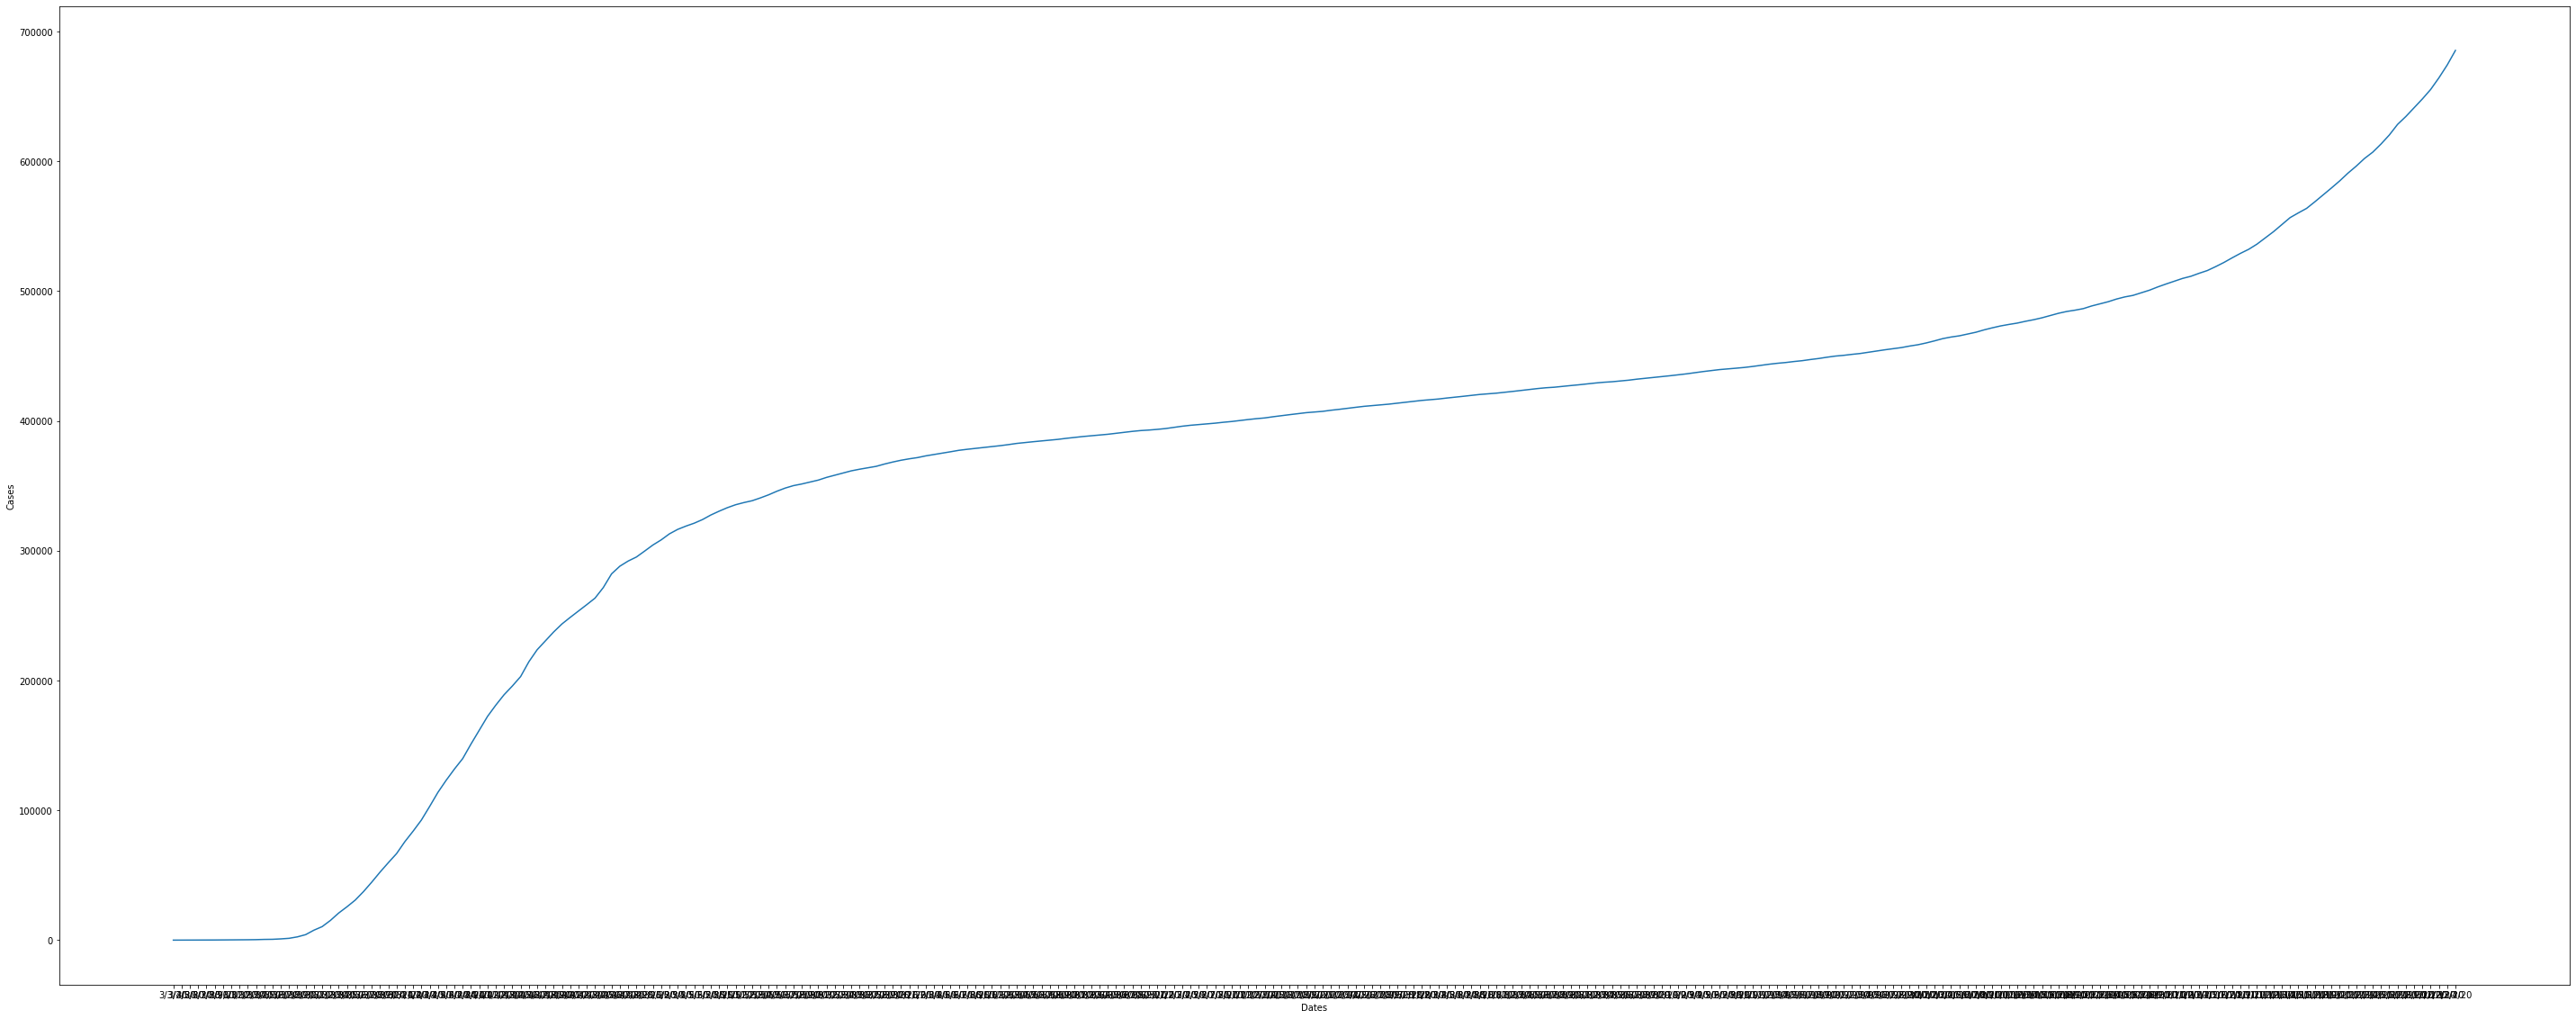

In [76]:
plt.rcParams['figure.figsize'] = [50,20]
sns.lineplot(data=cv_df,x='Dates',y='Cases')
plt.show()

In [77]:
cv_df.Dates=pd.to_datetime(cv_df.Dates)
cv_df.set_index("Dates")

,Cases
Dates,
2020-03-03,1
2020-03-04,10
2020-03-05,21
2020-03-06,24
2020-03-07,76
...,...
2020-11-30,647980
2020-12-01,655265
2020-12-02,664238


In [78]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#Checking for stationary mean and variance for the dataset
result=adfuller(cv_df['Cases'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.30203212438355637
p-value: 0.9252160290756906
Critical Values:
	1%: -3.4552699038400827
	5%: -2.8725092359464526
	10%: -2.5726152830188678


**From the above Augmented Dickey Fuller Test we can see that the p value is greater than 0.05 hence we can not reject the null hypothesis of the dataset being not stationary.**

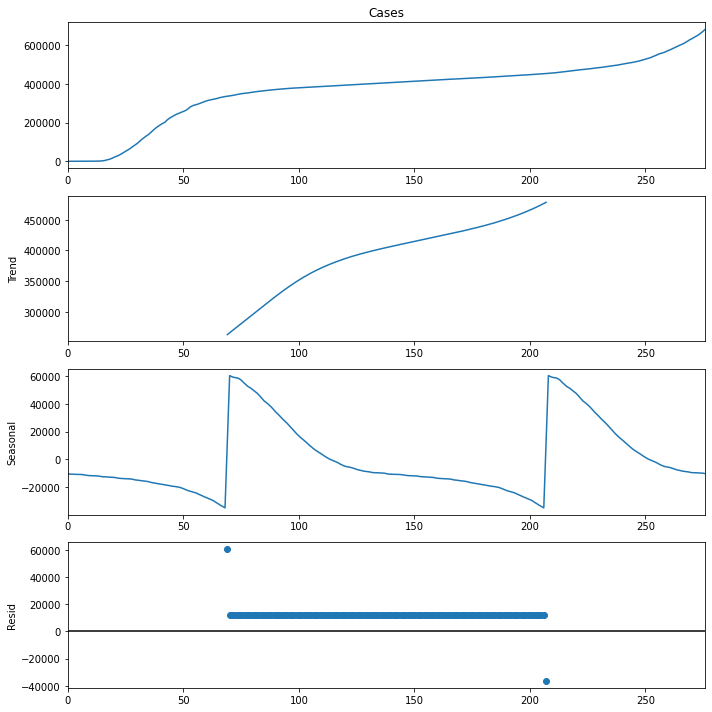

In [79]:
#Plotting seasonal decomposition
result2=seasonal_decompose(cv_df['Cases'], model='additive', period=int(len(cv_df)/2))
plt.rcParams.update({'figure.figsize': (10,10)})
result2.plot()
plt.show()

**From the above plots we can see:
Trend: Increasing with some decrease in daily case count increments
Seasonality:Steady decrease and sharp increase of covid cases**

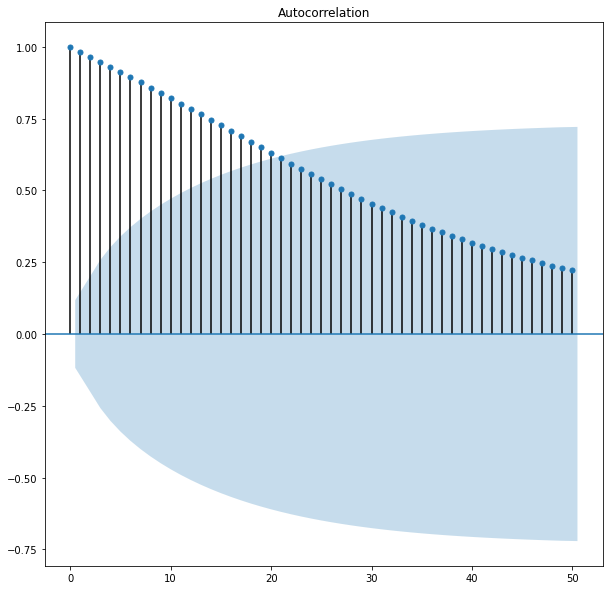

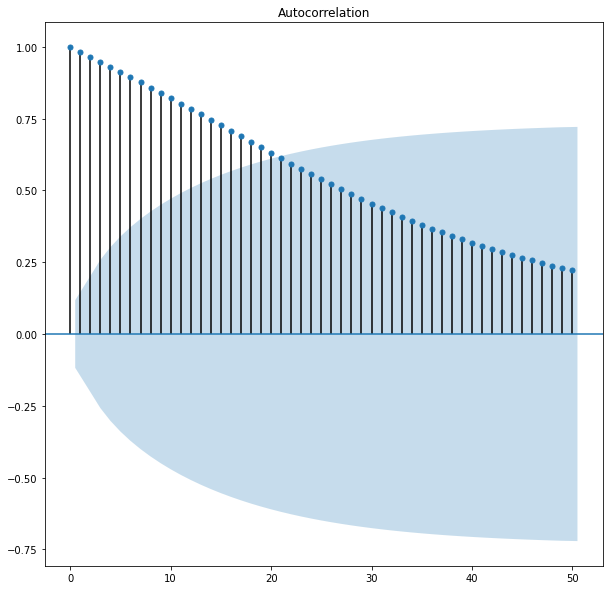

In [80]:
#Plotting Autocorrelation Graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cv_df['Cases'], lags=50)

**From the above autocorrelation plot we can see that there is positive correlation between all the datapoints which means that we the daily count increases it countinues to increase.**

In [81]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [82]:
#Splitting the data and getting the optimal order paramters
from pmdarima import auto_arima
import warnings
#ignore harmless warnings
warnings.filterwarnings('ignore')
train_size = int(len(cv_df) * 0.70)
train, test = cv_df['Cases'][0:train_size], cv_df['Cases'][train_size:]
train=train.astype('float64')
test=test.astype('float64')
test=test.reset_index(drop=True)
stepwise_fit = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2, seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3104.320, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3106.048, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3105.719, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3102.333, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3103.608, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.246 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  193
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1550.166
Date:                Sat, 19 Dec 2020   AIC                           3102.333
Time:                        04:09:42   BIC                           3105.585
Sample:                             0   HQIC                          3103.650
                                - 193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.51e+05   2.58e+04     25.220      0.000       6e+05    7.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               984.54
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
#Model selection and making predictions
model_best=ARIMA(train, order=(0,2,0))
model_best_fit=model_best.fit()
predictions_bw=model_best_fit.forecast(steps=len(test))[0]
rmse=np.sqrt(mean_squared_error(test, predictions_bw))
print(rmse)

49565.134341345925


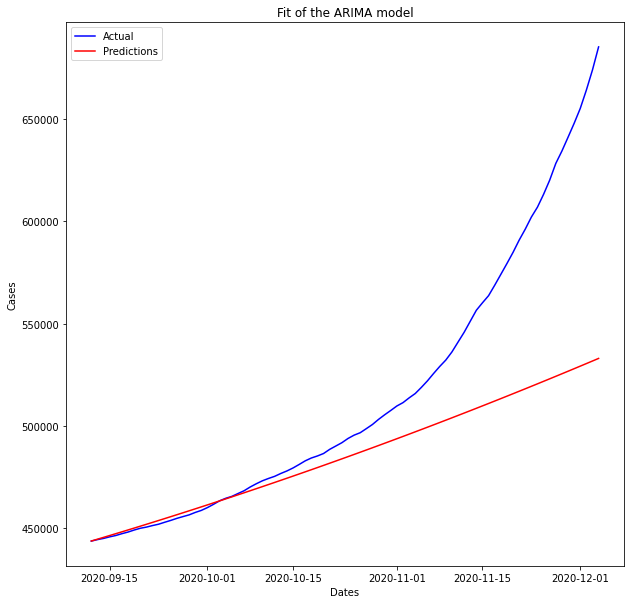

In [84]:
#Plotting the predictions vs observed values 
plt.rcParams.update({'figure.figsize': (10,10)})
plt.figure()
plt.plot(cv_df['Dates'][train_size:],test,'b',label='Actual')
plt.plot(cv_df['Dates'][train_size:],predictions_bw,'r',label='Predictions')
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title('Fit of the ARIMA model')
plt.legend()
plt.show()

**From the above plot we can see the that actual values fro covid cases increase exponentially after 5th october 2020 hence there is a need to stricten the covid19 prevention policies**

<Figure size 720x720 with 0 Axes>

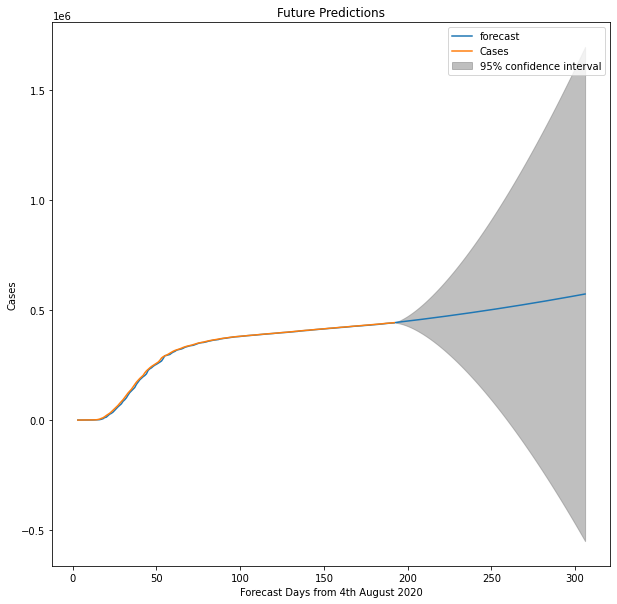

In [85]:
#Plotting different case scenarios for future forecast
plt.rcParams.update({'figure.figsize': (10,10)})
plt.figure()
model_best_fit.plot_predict(start=3,end=306, plot_insample=True)
plt.xlabel("Forecast Days from 4th August 2020")
plt.ylabel("Cases")
plt.title('Future Predictions')
plt.legend()
plt.show()

**From the above plot you can see that best case(lower bound of confidence interval), worst case(Upper bound of confidence interval) and average case scenario for the full time period of COVID19 data and next 1 month from 4th december 2020 for the state of New York.From the observed values of some future datasets the actual value lie slightly above the average case scenario.**

In [86]:
from google.colab import files
uploaded=files.upload()

In [87]:
#Loading Data
df2=pd.read_csv('data-2.csv')
df2.drop(df2[df2['administrative_area_level_2']!='New York'].index, inplace=True)
display(df2)

,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index,iso_alpha_3,iso_alpha_2,iso_numeric,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_google_mobility,key_apple_mobility,key_numeric,key_alpha_2
216389,bae2006a,2020-01-01,0,0.0,0,0,0,0,0,23628065.0,0,0,0,0,0,0,0,0,0,0,0,0.00,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216390,bae2006a,2020-01-02,0,0.0,0,0,0,0,0,23628065.0,0,0,0,0,0,0,0,0,0,0,0,0.00,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216391,bae2006a,2020-01-03,0,0.0,0,0,0,0,0,23628065.0,0,0,0,0,0,0,0,0,0,0,0,0.00,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216392,bae2006a,2020-01-04,0,0.0,0,0,0,0,0,23628065.0,0,0,0,0,0,0,0,0,0,0,0,0.00,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216393,bae2006a,2020-01-05,0,0.0,0,0,0,0,0,23628065.0,0,0,0,0,0,0,0,0,0,0,0,0.00,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216737,bae2006a,2020-12-14,22122139,784204.0,91366,27870,5712,567,1040,23628065.0,2,3,2,4,1,1,2,3,2,3,2,72.69,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216738,bae2006a,2020-12-15,22316327,794557.0,92136,28002,5982,580,1065,23628065.0,2,3,2,4,1,1,2,3,2,3,2,72.69,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216739,bae2006a,2020-12-16,22477274,804555.0,92735,28100,6097,611,1098,23628065.0,2,3,2,4,1,1,2,3,2,3,2,72.69,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY
216740,bae2006a,2020-12-17,22680046,815469.0,93418,28222,6147,611,1095,23628065.0,2,3,2,4,1,1,2,3,2,3,2,72.69,USA,US,840,USN,2,United States,New York,NaN,41.214647,-73.115615,NaN,New York,New York,NaN,NY


In [88]:
#Lockdown dates based on COVID policy adopted
lockdown_dates=pd.date_range(start='2020-03-03', end='2020-07-05')
df2.date=pd.to_datetime(df2.date)

In [89]:
l=[]
for j in lockdown_dates:
  for i in df2.index:
    if df2.loc[i,'date']==j:
      l.append(i)
l=list(set(l))

In [90]:
#Only considering data before lockdown end
lk_df=df2.loc[l,['date','confirmed']]
display(lk_df)

,date,confirmed
216451,2020-03-03,1.0
216452,2020-03-04,1.0
216453,2020-03-05,3.0
216454,2020-03-06,25.0
216455,2020-03-07,36.0
...,...,...
216571,2020-07-01,394079.0
216572,2020-07-02,394954.0
216573,2020-07-03,395872.0
216574,2020-07-04,396598.0


In [91]:
#Checking for stationary mean and variance using Augmented Dickey-Fuller Test
result3=adfuller(lk_df['confirmed'])
print('ADF Statistic: {}'.format(result3[0]))
print('p-value: {}'.format(result3[1]))
print('Critical Values:')
for key, value in result3[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.4174709030681054
p-value: 0.01037751396746965
Critical Values:
	1%: -3.4880216384691867
	5%: -2.8867966864160075
	10%: -2.5802408234244947


**From the above Augmented Dickey Fuller Test we can see that the p value is less than 0.05 hence we can reject the null hypothesis of the dataset being not stationary.**

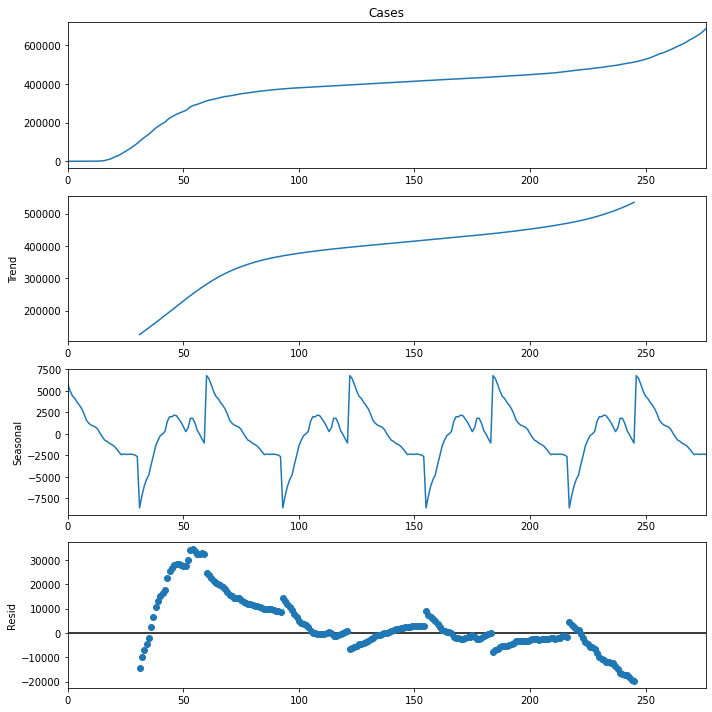

In [92]:
#Plotting seasonal decomposition of the dataset
result4=seasonal_decompose(cv_df['Cases'], model='additive', period=int(len(lk_df)/2))
plt.rcParams.update({'figure.figsize': (10,10)})
result4.plot()
plt.show()

**From the above plots we can see:
Trend: Increasing with some decrease in daily case count increments
Seasonality:Steady decrease and unsteady increase of covid cases**

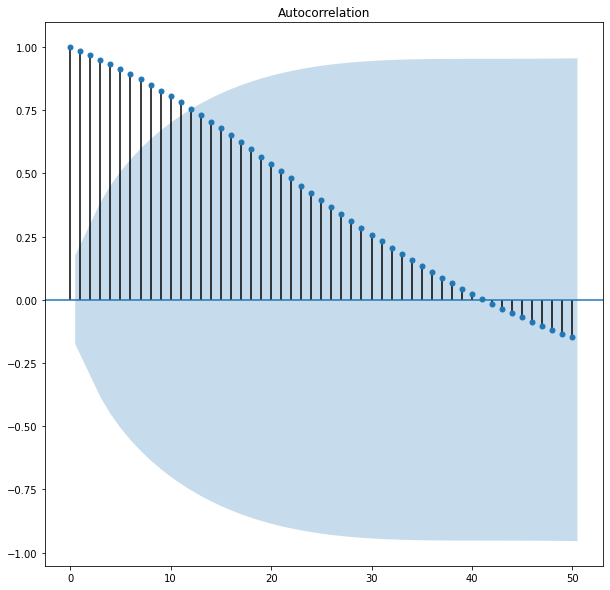

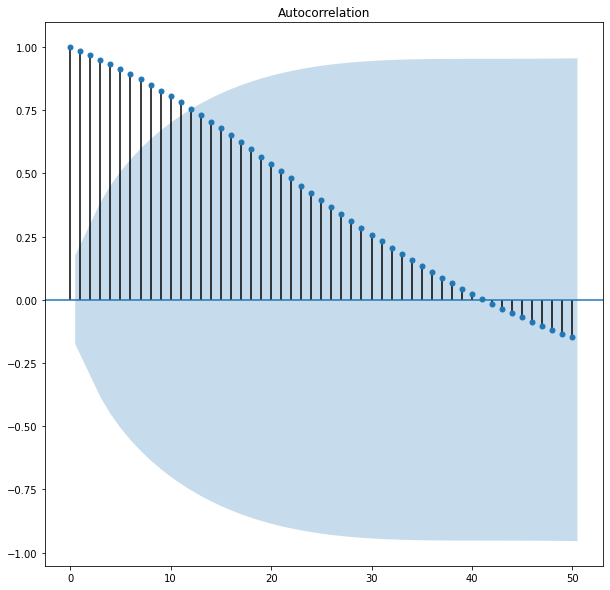

In [93]:
#Plotting Autocorrelation Graph
plot_acf(lk_df['confirmed'], lags=50)

**From the above autocorrelation plot we can see that there is positive correlation between all the datapoints which means that we the daily count increases it countinues to increase.**

In [94]:
#Splitting data and getting the optimal order parameters 
warnings.filterwarnings('ignore')
train_size = int(len(lk_df) * 0.70)
train, test = lk_df['confirmed'][0:train_size], lk_df['confirmed'][train_size:]
train=train.astype('float64')
test=test.astype('float64')
test=test.reset_index(drop=True)
stepwise_fit = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2, seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1449.936, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1451.878, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1451.922, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1447.962, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1452.049, Time=0.16 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.243 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -722.981
Date:                Sat, 19 Dec 2020   AIC                           1447.962
Time:                        04:09:57   BIC                           1450.405
Sample:                             0   HQIC                          1448.945
                                 - 87                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.43e+06    1.3e+05     10.962      0.000    1.17e+06    1.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                48.29
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.21
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
#Model fitting and making predictions
model_best=ARIMA(train, order=(0,2,0))
model_best_fit=model_best.fit()
predictions_bw=model_best_fit.forecast(steps=len(test))[0]
rmse=np.sqrt(mean_squared_error(test, predictions_bw))
print(rmse)

27503.493211590405


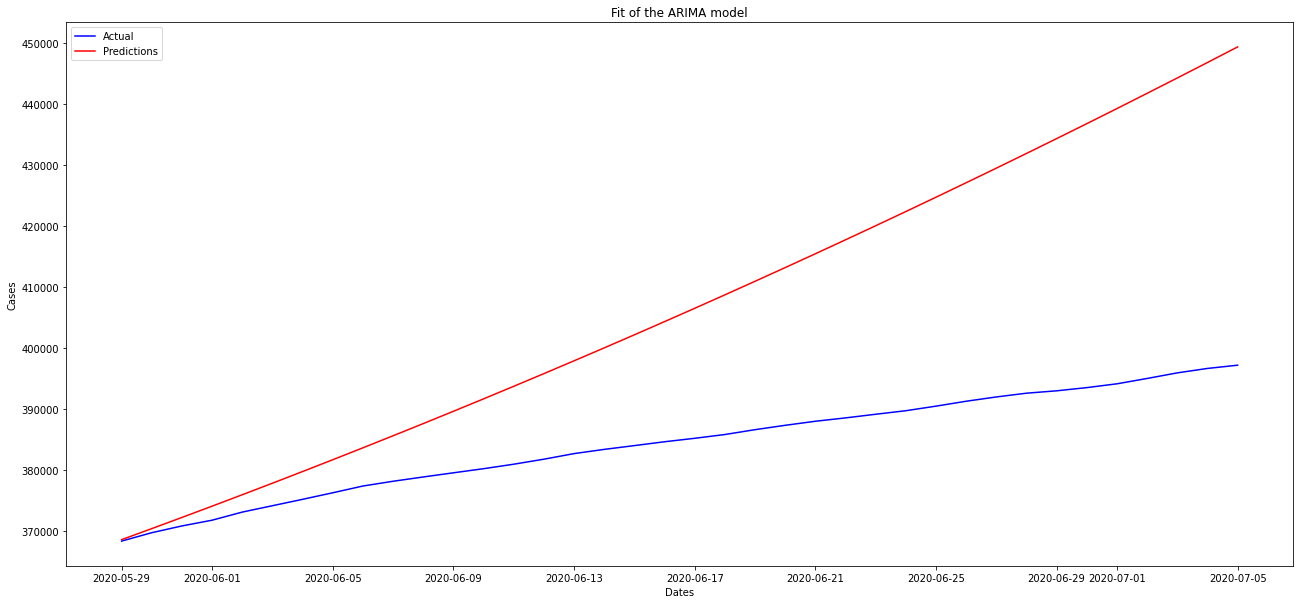

In [101]:
#Plotting predictions vs observed value
plt.rcParams.update({'figure.figsize': (22,10)})
plt.figure()
plt.plot(lk_df['date'][train_size:],test,'b',label='Actual')
plt.plot(lk_df['date'][train_size:],predictions_bw,'r',label='Predictions')
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title('Fit of the ARIMA model')
plt.legend()
plt.show()

**From the above plot we can that the actual values for daily cases is lower the predicted ones hence we can conclude that hard loackdown policy(gatherings>=3,work_closing=3,school_closing=3,international_travel_restrictions=3,contact_tracing=2) work very well in reducing the daily cases of covid19.**

<Figure size 720x720 with 0 Axes>

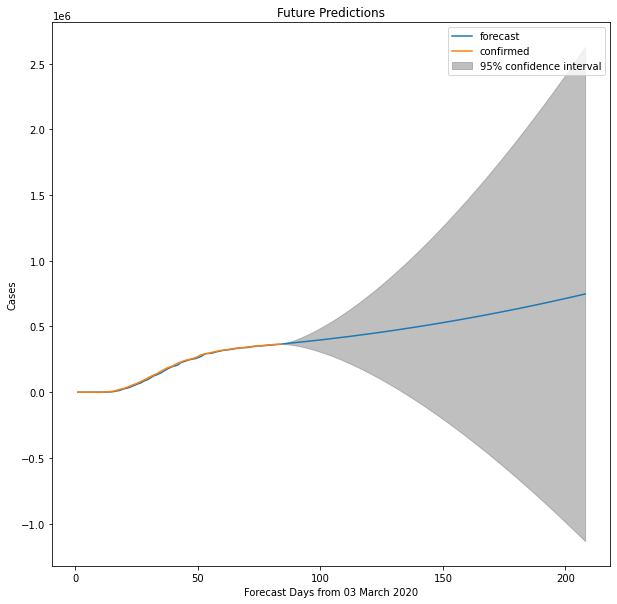

In [97]:
#Plotting different case scenarios for future forecast
plt.rcParams.update({'figure.figsize': (10,10)})
plt.figure()
model_best_fit.plot_predict(start=3,end=210, plot_insample=True)
plt.xlabel("Forecast Days from 03 March 2020")
plt.ylabel("Cases")
plt.title('Future Predictions')
plt.legend()
plt.show()

**From the above plot you can see that best case(lower bound of confidence interval), worst case(Upper bound of confidence interval) and average case scenario for the full time period of COVID19 data for the state of New York based on the lockdown dataset.From the observed values of some future datasets the actual value lie slightly above the average case scenario.**